# Анна Тимошенко (Дата Аналитик)
# Задание #3 Sklearn и основы ML

## Инструменты и ресурсы для выполнения задания

### Библиотеки Python

* [Sklearn](http://scikit-learn.org/stable/).
  - [Introduction to machine learning in Python with scikit-learn](http://www.dataschool.io/machine-learning-with-scikit-learn/).
* [Kaggle Python Tutorial on Machine Learning](https://campus.datacamp.com/courses/kaggle-python-tutorial-on-machine-learning).

### Ресурсы по изучению ML
* [ML from Stanford University](https://www.coursera.org/learn/machine-learning/). Самый базовый курс.
* [Введение в машинное обучение](https://www.coursera.org/learn/vvedenie-mashinnoe-obuchenie/). Курс професссора Воронцова К.В. на coursera.org. Существенно более полный, чем курс Andrew Ng, но сокращен по сравнению с курсом, читаемым в ШАД.

![what I really do](https://pp.vk.me/c629431/v629431882/2a1a8/7EAKCA_FtnA.jpg)
  
## Разминка
1. Загрузите набор данных [Spambase](https://archive.ics.uci.edu/ml/datasets/Spambase). *Сами данные находятся по ссылке http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data. Вам также потребуются имена признаков, которые доступны по ссылке http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names*.

In [1]:
import wget
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Загрузим необходимые файлы
wget.download('http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', 'spambase.data')
wget.download('http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names', 'spambase.names')

'spambase.names'

In [3]:
# Посмотрим содержание файла с именами признаков
with open('spambase.names', 'r') as f:
    columns = []
    for line in f:
        print(line)

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)

|

| 48 continuous real [0,100] attributes of type word_freq_WORD 

| = percentage of words in the e-mail that match WORD,

| i.e. 100 * (number of times the WORD appears in the e-mail) / 

| total number of words in e-mail.  A "word" in this case is any 

| string of alphanumeric characters bounded by non-alphanumeric 

| characters or end-of-string.

|

| 6 continuous real [0,100] attributes of type char_freq_CHAR

| = percentage of characters in the e-mail that match CHAR,

| i.e. 100 * (number of CHAR occurences) / total characters in e-mail

|

| 1 continuous real [1,...] attribute of type capital_run_length_average

| = average length of uninterrupted sequences of capital letters

|

| 1 continuous integer [1,...] attribute of type capital_run_length_longest

| = length of longest uninterrupted sequence of capital letters

|

| 1 continuous integer [1,...] attribute of type capital_run_length_total

| = sum of length of uninte

In [4]:
# Соберём названия колонок из файла
with open('spambase.names', 'r') as f:
    columns = []
    for line in f:
        c = re.search(r'^[\w+\_]{2}.+(?=\:)', line)
        if c:
            columns.append(c.group())
# Как указано в документации, последняя колонка - это признак, является ли письмо спамом
columns.append('spam')

In [5]:
df = pd.read_csv('spambase.data', header=None, names=columns, sep=',')

In [6]:
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


2. Ответьте на следующие воросы:
  * Сколько примеров писем в датасете?

In [7]:
df.shape[0]

4601

  * Какова доля спама?

In [8]:
df[df.spam == 1].shape[0] / df.shape[0]

0.39404477287546186

  * Какие характерные группы признаков представлены в наборе?

* процент слов в электронном письме, которые соответствуют конкретному слову
* процент символов в электронном письме, которые соответствуют конкретному символу
* средняя длина непрерывных последовательностей заглавных букв
* длина самой длинной непрерывной последовательности заглавных букв
* сумма длин непрерывных последовательностей заглавных букв (=общее количество заглавных букв в электронном письме)
* атрибут, показывающий спам это или нет

3. Подготовьте два разбиения исходного набора данных на тестовую (test) и обучающую (train) выборки:
  * Первые 3000 писем отдайте на обучение, а оставшиеся на тест.
  * Сделайте случайное разбиение в тех же пропорциях.

In [9]:
X = df.drop("spam", axis = 1).values
y = df["spam"].values

In [10]:
X_train1 = X[:3000]
X_test1 = X[3000:]
y_train1 = y[:3000]
y_test1 = y[3000:]

In [11]:
# Используем функцию библиотеки scikit-learn для случайного разбиения в нужных пропорциях
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=(3000 / df.shape[0]), random_state=42)

4. Для первого из разбиений обучите алгоритм sklearn.tree.DecisionTreeClassifier на обучающей выборке.

In [12]:
tree = DecisionTreeClassifier()
tree.fit(X_train1, y_train1)
y_pred1 = tree.predict(X_test1)

5. Замерьте метрики качества recall, precision, f1, accuracy на тестовой выборке из первого разбиения.

In [13]:
print(f"Recall: \t {recall_score(y_test1, y_pred1):.3f}")
print(f"Precision: \t {precision_score(y_test1, y_pred1):.3f}")
print(f"F1 score:' \t {f1_score(y_test1, y_pred1):.3f}")
print(f"Accuracy: \t {accuracy_score(y_test1, y_pred1):.2%}")

Recall: 	 0.000
Precision: 	 0.000
F1 score:' 	 0.000
Accuracy: 	 78.83%


C:\Users\Anna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6. Повторите пункты 4. и 5. для второго разбиения.

In [14]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(f"Recall: \t {recall_score(y_test, y_pred):.3f}")
print(f"Precision: \t {precision_score(y_test, y_pred):.3f}")
print(f"F1 score:' \t {f1_score(y_test, y_pred):.3f}")
print(f"Accuracy: \t {accuracy_score(y_test, y_pred):.2%}")

Recall: 	 0.906
Precision: 	 0.884
F1 score:' 	 0.895
Accuracy: 	 91.26%


7. Объясните разницу в результатах. **Далее используйте только второе (случайное) разбиение.**

У нас в тестовую выборку в первом разбиении попали исключительно строки с атрибутом spam = 0, то есть все письма не являются спамом.

In [15]:
df[3000:].spam.unique()

array([0], dtype=int64)

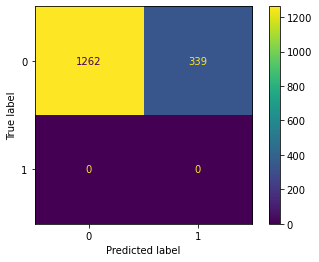

In [16]:
# Посмотрим матрицу ошибок на первом разбиении
cm = confusion_matrix(y_test1, y_pred1, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot()
plt.show()

Так как в тестовой выборке полностью отсутствуют письма со спамом, а модель предсказала какое-то количество спам-писем (в этом её смысл!), мы получаем 0 True Positive (истинно-положительных: модель верно предсказала спам) и 0 False Negative (ложно-отрицательных - модель решила, что это не спам, а это спам) решений.

Отсюда мы сразу же получаем: 
* 0 Recall (Полнота) = TP / (TP + FN) (и предупреждение т.к. в знаменателе 0) и 
* 0 Precision (Точность) = TP / (TP + TN) (True Negative - истинно-отрицательных у нас 1262, т.е. правильно предсказан не-спам)
* Accuracy = (TP + TN) / (TP + TN + FP + FN) - в принципе довольно высокий результат за счёт предсказанных не-спам писем
* 0 F1-меру = 2 * TP * TN / (TP + TN), т.к. TP = 0

**Наша тестовая выборка (в первом разбиении) попросту не позволяет оценить работу модели**

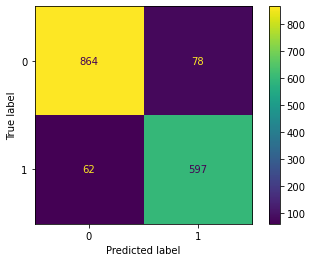

In [17]:
# Посмотрим матрицу ошибок на втором разбиении
cm = confusion_matrix(y_test, y_pred, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot()
plt.show()

Видим значительное количество верно предсказанных 0 и 1 (верхний левый и правый нижний квадрат), и соответственно метрики Точность, Полнота, F1 имеют довольно высокие значения (близкие к 0.9)

8. Для модели, обученной на случайном разбиении, выведите оценку информативности признаков (feature importance).

Text(0.5, 1.0, 'Feature importances')

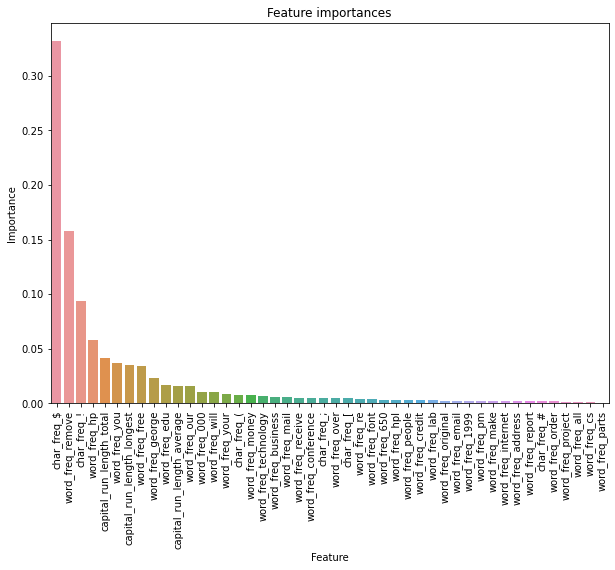

In [18]:
# Выведем те признаки, которые получили оценку информативности > 0
importances = tree.feature_importances_
tree_importances = pd.Series(importances, index=df.drop("spam", axis = 1).columns)
to_display = tree_importances[tree_importances > 0].sort_values(ascending=False)
to_display = to_display.reset_index()
to_display.columns = ['Feature', 'Importance']

plt.figure(figsize=(10, 7))
ax = sns.barplot(data=to_display,
                 x='Feature',
                 y='Importance'
                )
plt.xticks(rotation=90)
ax.set_title('Feature importances')

9. Предложите способ, как можно использовать данную оценку?

Чем выше значение оценки информативности признака, тем больший эффект этот признак оказывает на предсказывающую модель. Считается, что оценка информативности признаков помогает лучше понять данные, и, например, менять стратегию по сбору данных для дальнейшей работы. Основываясь на этой оценке можно какие-то признаки удалить, для того, чтобы улучшить производительность модели, увеличить скорость работы.

In [19]:
# можем попробовать обучить дерево на той части признаков, у которой информативность выше 0
best_features = tree_importances[tree_importances > 0.1].index.values.tolist()
X = df[best_features].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=(3000 / df.shape[0]), random_state=42)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(f"Recall: \t {recall_score(y_test, y_pred):.3f}")
print(f"Precision: \t {precision_score(y_test, y_pred):.3f}")
print(f"F1 score:' \t {f1_score(y_test, y_pred):.3f}")
print(f"Accuracy: \t {accuracy_score(y_test, y_pred):.2%}")

Recall: 	 0.654
Precision: 	 0.904
F1 score:' 	 0.759
Accuracy: 	 82.89%


Как видно, значение Precision чуть лучше, но Recall значительно хуже, что соответственно сказалось на F1-мере, но я предполагаю, что для более точных оценок модель необходимо запускать несколько раз в каждом случае, и в целом мой подход довольно наивный, т.к. я не являюсь специалистом в ML

10. Предложите способ, которым решающее дерево способно дать такую оценку.

11. Обучите алгоритм sklearn.neighbors.KNeighborsClassifier на обучающей выборке и произведите оценку качества модели на тестовой выборке.

12. Какая из обученных моделей лучше?

13. Способен ли KNN оценить информативность признаков?

14. Произведите нормировку обучающей и тестовой выборок.

15. Повторите эксперимент с KNN на нормированных данных. Объясните разницу в результатах.

16. Повторите эксперимент с решающим деревом на нормированных данных. Сравните результаты с теми, которые получены на ненормированных данных. Объясните подобное поведение.

17. Пропорции разбиения на данный момент выбраны безосновательно. Найдите оптимальные пропорции разбиения на train и test. Для этого необходимо перебрать значения пропорции разбиения по сетке, для каждого значения сгенерировать большое число разбиений и на каждом посчитать ошибку (с точки зрения выбранной метрики, например, f1), далее строится график зависимости дисперсии величины ошибки от пропорции разбиения, пропорция разбиения выбирается из области наименьшей дисперсии ошибки. Выберите метрику и постройте график зависимости дисперсии ошибки от пропорции разбиения.

18. Однократное разбиение выборки на train и test не является достаточно хорошим методом с точки зрения оценки качества моделей. На практике используется многократное разбиение или т.н. Cross Validation. Получите оценки качества для решающего дерева и KNN, используя Cross Validation. *Существует несколько типов Cross Validation. Выберите один из них и обоснуйте свой выбор.*

19. На данный момент параметры алгоритмов KNN и Decision Tree выбраны наугад. Для одбора параметров используется т.н. Greed Search. 
  - Найдите оптимальный набор параметров дерева, перебрав значения параметров по сетке. Параметры для настройки: критерий разбиения, максимальная глубина, число признаков для каждого узла, минимальное число объектов в листе.
  - Найдите оптимальный набор параметров для KNN, перебрав значения параметров по сетке. Параметры для настройки: число соседей, функция расстояния, схема взвешивания.